# Compare similarity scores

In [1]:
import os
import numpy as np
import specvae.utils as utils
from specvae.utils import filter_score_matrix
import specvae.dataset as dt
from specvae.visualize import plot_distribution, plot_precentile
from specvae.dataset import MoNA

In [2]:
dataset = 'MoNA'

In [3]:
# Load score matrices
cs = np.load(utils.get_project_path() / '.data' / dataset / ('%s_cossim.npz' % dataset), allow_pickle=True)
cos_sim, cos_match = cs['sim'], cs['match']
mcs = np.load(utils.get_project_path() / '.data' / dataset / ('%s_modcossim.npz' % dataset), allow_pickle=True)
modcos_sim, modcos_match = mcs['sim'], mcs['match']
spec2vec_scores = np.load(utils.get_project_path() / '.data' / dataset / ('%s_spec2vec.npz' % dataset), allow_pickle=True)
s2v_sim = spec2vec_scores['sim']
jaccard_scores = np.load(utils.get_project_path() / '.data' / dataset / ('%s_sim_jaccard.npy' % dataset), allow_pickle=True)
# vs = np.load(utils.get_project_path() / '.data' / dataset / ('%s_vaesim_d0.050000_kl0.000500.npz' % dataset), allow_pickle=True)
# vae_eu_sim, vae_kl_sim = vs['vae_eu'], vs['vae_kl']

## Plot structural similarity histogram

In [4]:
from matplotlib import pyplot as plt
plot_density=False # takes a lot of time :(

In [5]:
jaccard_scores_f = filter_score_matrix(jaccard_scores.copy())
jaccard_scores.shape, jaccard_scores_f.shape

((12198, 12198), (72306325,))

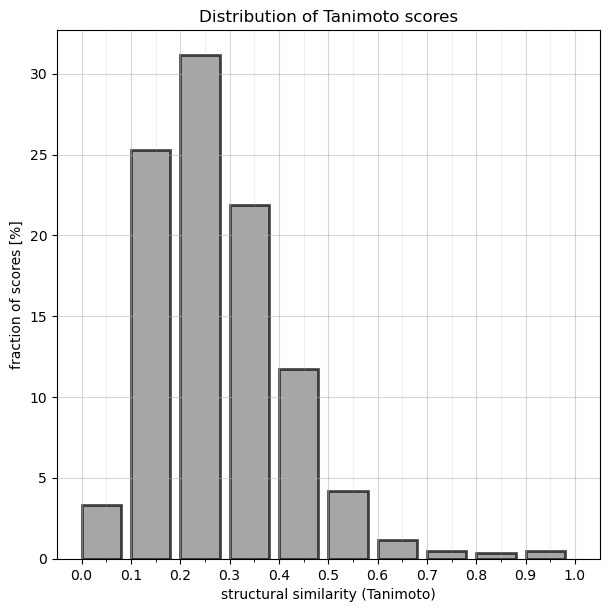

In [6]:
dist = plot_distribution(jaccard_scores_f, 'Tanimoto', 
    xlabel="structural similarity (Tanimoto)", ylabel="fraction of scores [%]",
    plot_density=plot_density)

In [7]:
print("Fraction of scores [%] for tanimoto >= 0.6")
dist[-4:].sum() * 100.

Fraction of scores [%] for tanimoto >= 0.6


2.431492680619573

## Select high scores and plot correlation

In [8]:
ignore_diagonal = True
num_bins=100
show_top_percentile=0.1

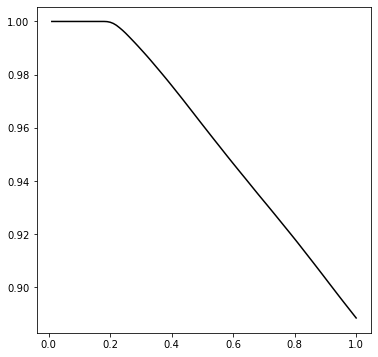

In [9]:
per_tan = plot_precentile(jaccard_scores, jaccard_scores, num_bins=num_bins, 
    show_top_percentile=1.0, ignore_diagonal=ignore_diagonal)

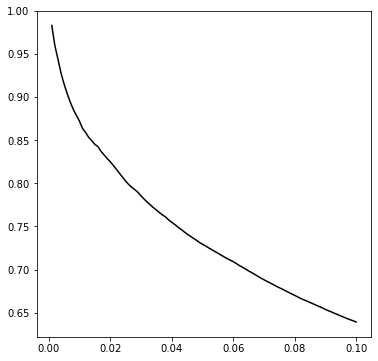

In [10]:
per_cos = plot_precentile(jaccard_scores, cos_sim, num_bins=num_bins, 
    show_top_percentile=show_top_percentile, ignore_diagonal=ignore_diagonal)

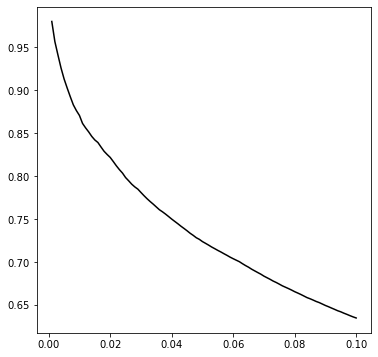

In [11]:
per_modcos = plot_precentile(jaccard_scores, modcos_sim, num_bins=num_bins, 
    show_top_percentile=show_top_percentile, ignore_diagonal=ignore_diagonal)

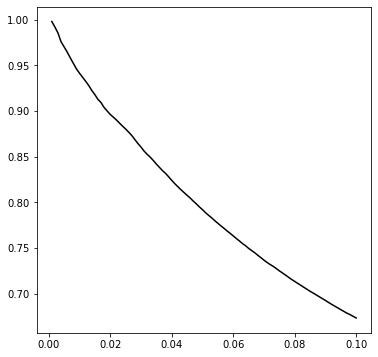

In [12]:
per_s2v = plot_precentile(jaccard_scores, s2v_sim, num_bins=num_bins, 
    show_top_percentile=show_top_percentile, ignore_diagonal=ignore_diagonal)

In [ ]:
# per_vaeeu = plot_precentile(jaccard_scores, vae_eu_sim, num_bins=num_bins, 
#     show_top_percentile=show_top_percentile, ignore_diagonal=ignore_diagonal)

In [ ]:
def select_subset(score, n, inum=20):
    idx, idy, s = np.array([], dtype=np.int64), np.array([], dtype=np.int64), np.array([], dtype=np.float64)
    step = 1. / inum
    ints = [(step*i, step*(i + 1)) for i in range(inum)]
    for it in ints:
        lower, upper = it
        m = np.logical_and(score >= lower, score < upper)
        w = np.where(m)
        idx_, idy_ = w[0], w[1]
        s_ = score[m]
        if idx_.shape[0] > (n / inum):
            n_ = int(n / inum)
            idx_, idy_, s_ = idx_[:n_], idy_[:n_], s_[:n_]
        idx = np.concatenate((idx, idx_))
        idy = np.concatenate((idy, idy_))
        s = np.concatenate((s, s_))
    return idx, idy, s


def avg_score(score, d, bnum = 20):
    step = 1. / bnum
    d_x, d_avg = [], []
    for b in range(bnum):
        s_, e_ = b * step, (b + 1) * step
        d_x.append((s_ + e_) / 2.)
        d_avg.append(np.average(d[np.logical_and(score >= s_, score < e_)]))
    return d_x, d_avg

In [ ]:
idx, idy, s = select_subset(spec2vec_scores, 5000)

In [ ]:
idx, idy, s

In [ ]:
js = jaccard_scores[idx, idy]

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(s, js, c=js, cmap='gist_heat')
# ax.plot(d_x, d1_avg, linewidth=4, color='blue')
plt.xlim(0, 1)
# plt.ylim(0,1)
# plt.title('metric=euclidean, n=1000, a=0.05', loc='left', fontsize=14)
plt.xlabel('Cosine Similarity Score', fontsize=18)
plt.ylabel('structural similarity', fontsize=18)
plt.show()